# import libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random as rd

# Because the target column is in the calories csv, we have to merge these 2 csv files

In [49]:
# import the first csv file
first_csv = pd.read_csv('exercise.csv')

# import the second csv file
second_csv = pd.read_csv('calories.csv')

# check the files

In [9]:
first_csv

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp
0,14733363,male,68,190.0,94.0,29.0,105.0,40.8
1,14861698,female,20,166.0,60.0,14.0,94.0,40.3
2,11179863,male,69,179.0,79.0,5.0,88.0,38.7
3,16180408,female,34,179.0,71.0,13.0,100.0,40.5
4,17771927,female,27,154.0,58.0,10.0,81.0,39.8
...,...,...,...,...,...,...,...,...
14995,15644082,female,20,193.0,86.0,11.0,92.0,40.4
14996,17212577,female,27,165.0,65.0,6.0,85.0,39.2
14997,17271188,female,43,159.0,58.0,16.0,90.0,40.1
14998,18643037,male,78,193.0,97.0,2.0,84.0,38.3


In [10]:
second_csv

,User_ID,Calories
0,14733363,231.0
1,14861698,66.0
2,11179863,26.0
3,16180408,71.0
4,17771927,35.0
...,...,...
14995,15644082,45.0
14996,17212577,23.0
14997,17271188,75.0
14998,18643037,11.0


# Merge these 2 files

In [50]:
# merge these 2 csv files based on their common key (User_ID)
final_csv = pd.merge(first_csv, second_csv, on='User_ID')

In [51]:
# check the final csv file
final_csv

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,14733363,male,68,190.0,94.0,29.0,105.0,40.8,231.0
1,14861698,female,20,166.0,60.0,14.0,94.0,40.3,66.0
2,11179863,male,69,179.0,79.0,5.0,88.0,38.7,26.0
3,16180408,female,34,179.0,71.0,13.0,100.0,40.5,71.0
4,17771927,female,27,154.0,58.0,10.0,81.0,39.8,35.0
...,...,...,...,...,...,...,...,...,...
14995,15644082,female,20,193.0,86.0,11.0,92.0,40.4,45.0
14996,17212577,female,27,165.0,65.0,6.0,85.0,39.2,23.0
14997,17271188,female,43,159.0,58.0,16.0,90.0,40.1,75.0
14998,18643037,male,78,193.0,97.0,2.0,84.0,38.3,11.0


# drop user id column

In [52]:
final_csv.drop('User_ID', axis=1, inplace=True)

In [15]:
final_csv

,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,male,68,190.0,94.0,29.0,105.0,40.8,231.0
1,female,20,166.0,60.0,14.0,94.0,40.3,66.0
2,male,69,179.0,79.0,5.0,88.0,38.7,26.0
3,female,34,179.0,71.0,13.0,100.0,40.5,71.0
4,female,27,154.0,58.0,10.0,81.0,39.8,35.0
...,...,...,...,...,...,...,...,...
14995,female,20,193.0,86.0,11.0,92.0,40.4,45.0
14996,female,27,165.0,65.0,6.0,85.0,39.2,23.0
14997,female,43,159.0,58.0,16.0,90.0,40.1,75.0
14998,male,78,193.0,97.0,2.0,84.0,38.3,11.0


# check null-nan values

In [16]:
final_csv.isnull().mean() * 100

Gender        0.0
Age           0.0
Height        0.0
Weight        0.0
Duration      0.0
Heart_Rate    0.0
Body_Temp     0.0
Calories      0.0
dtype: float64

 # EDA (Exploratory Data Analysis)

<Axes: xlabel='Gender', ylabel='count'>

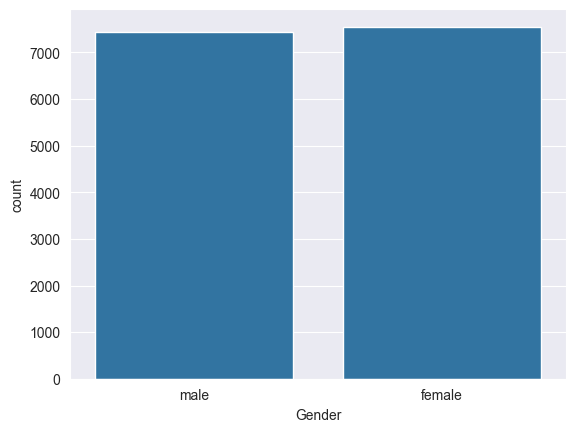

In [26]:
sns.countplot(data=final_csv, x='Gender')

<Axes: xlabel='Duration', ylabel='Calories'>

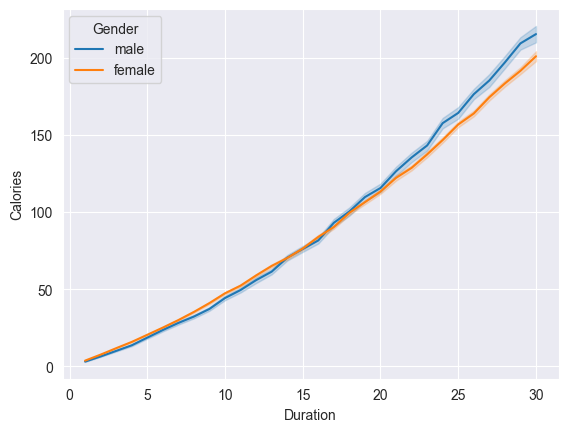

In [27]:
sns.lineplot(data=final_csv, x='Duration', y='Calories', hue='Gender')

<Axes: xlabel='Gender', ylabel='Calories'>

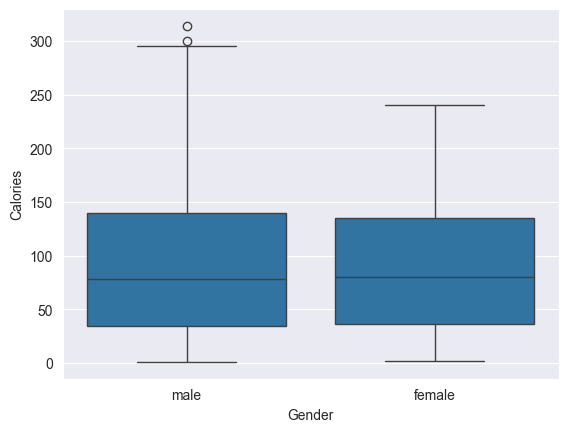

In [30]:
sns.boxplot(data=final_csv, x='Gender', y='Calories')

<Axes: xlabel='Weight', ylabel='Calories'>

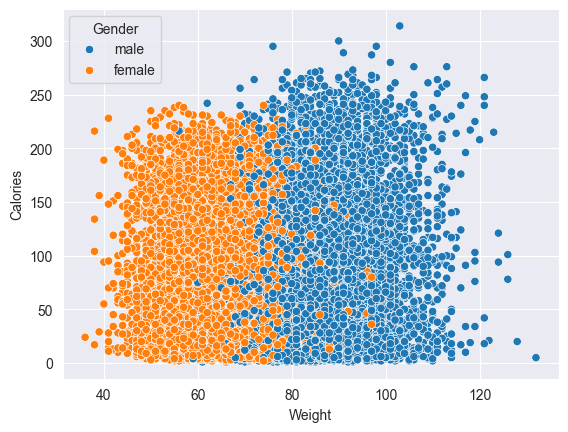

In [32]:
sns.scatterplot(data=final_csv, x='Weight', y='Calories', hue='Gender')

<Axes: >

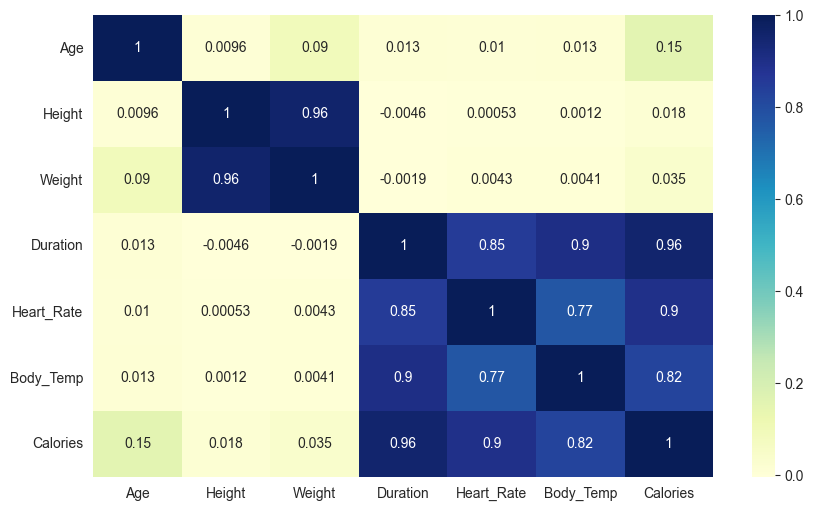

In [34]:
plt.figure(figsize=(10, 6))
sns.heatmap(final_csv.corr(numeric_only=True), annot=True, cmap='YlGnBu')

In [48]:
final_csv['Gender'].value_counts()

Gender
0    15000
Name: count, dtype: int64

# convert gender column to numerical

In [53]:
final_csv['Gender'] = final_csv['Gender'].apply(lambda x: 1 if x == 'male' else 0)

final_csv['Gender'].value_counts()

Gender
0    7553
1    7447
Name: count, dtype: int64

In [54]:
final_csv

,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,1,68,190.0,94.0,29.0,105.0,40.8,231.0
1,0,20,166.0,60.0,14.0,94.0,40.3,66.0
2,1,69,179.0,79.0,5.0,88.0,38.7,26.0
3,0,34,179.0,71.0,13.0,100.0,40.5,71.0
4,0,27,154.0,58.0,10.0,81.0,39.8,35.0
...,...,...,...,...,...,...,...,...
14995,0,20,193.0,86.0,11.0,92.0,40.4,45.0
14996,0,27,165.0,65.0,6.0,85.0,39.2,23.0
14997,0,43,159.0,58.0,16.0,90.0,40.1,75.0
14998,1,78,193.0,97.0,2.0,84.0,38.3,11.0


 # Split the data

In [55]:
# import train_split function
from sklearn.model_selection import train_test_split

# all columns except the target column
X = final_csv.drop('Calories', axis=1)

# target column
y = final_csv['Calories']

# split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Linear Regression Model

In [56]:
# import linear Regression Model
from sklearn.linear_model import LinearRegression

# create an instance of Linear Regression model
lr = LinearRegression()

# fit the model
lr.fit(X_train, y_train)

LinearRegression()

# predictions

In [70]:
features = np.array([[rd.choice(X_test[column].tolist()) for column in X_test.columns]])

In [71]:
predictions = lr.predict(features)

print(f'Prediction: {predictions[0]}')

Prediction: 141.54944284899045


C:\Users\nick-\PycharmProjects\pythonProject1\.venv\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [74]:
actual_value = rd.choice(y_test.values)

In [77]:
# error 

error = abs(actual_value - predictions[0])

print(f'Error: {error}')

Error: 36.45055715100955
